### **MNIST Handwritten Digits Dataset - Tasks (Using CNN)**

1. **Load the Dataset:**
   - Load the MNIST dataset and normalize the pixel values to the range 0-1.
   - Reshape the data to have a shape of `(28, 28, 1)` to match the input format for CNNs.

2. **Build a CNN Model:**
   - **Input Layer:** Accepts images of shape `(28, 28, 1)`.
   - **Convolutional Layer 1:** 32 filters, kernel size `(3, 3)`, ReLU activation.
   - **MaxPooling Layer 1:** Pool size `(2, 2)`.
   - **Convolutional Layer 2:** 64 filters, kernel size `(3, 3)`, ReLU activation.
   - **MaxPooling Layer 2:** Pool size `(2, 2)`.
   - **Flatten Layer:** Flattens the feature maps into a 1D vector.
   - **Dense Hidden Layer:** 128 neurons with ReLU activation.
   - **Output Layer:** 10 neurons with softmax activation.

3. **Compile the Model:**
   - Use the Adam optimizer, categorical crossentropy as the loss function, and accuracy as a metric.

4. **Train the Model:**
   - Train the model on the training dataset for 10 epochs with a batch size of 32.

5. **Evaluate the Model:**
   - Evaluate the model on the test dataset and report the test accuracy.

6. **Predict on Test Samples:**
   - Use the trained model to predict the classes for 5 random test samples.
   - Display the images with their predicted and actual labels.

7. **Calculate Metrics:**
   - Compute precision, recall, and F1-score for each class using the test dataset.
   - Include these metrics in the evaluation report.

8. **Save and Reload the Model:**
   - Save the trained model to a file.
   - Reload the model and use it for predictions on new data.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###*Building the CNN Model*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Input Layer and Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###*Compiling the Model*

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


###*Training the Model*

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9003 - loss: 0.3215 - val_accuracy: 0.9847 - val_loss: 0.0507
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9858 - val_loss: 0.0499
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9905 - val_loss: 0.0382
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9949 - loss: 0.0157 - val_accuracy: 0.9927 - val_loss: 0.0311
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9964 - loss: 0.0110 - val_accuracy: 0.9900 - val_loss: 0.0449
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9915 - val_loss: 0.0354
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9979 -

###*Evaluating the Model*

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.14%


###*Predicting on Test Samples*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


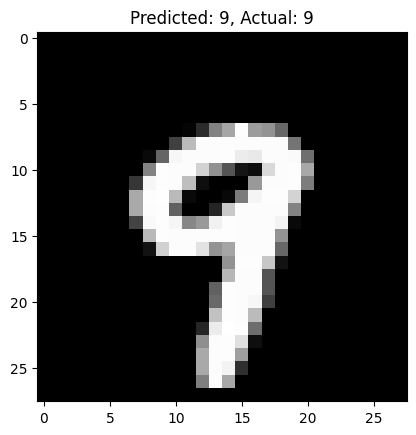

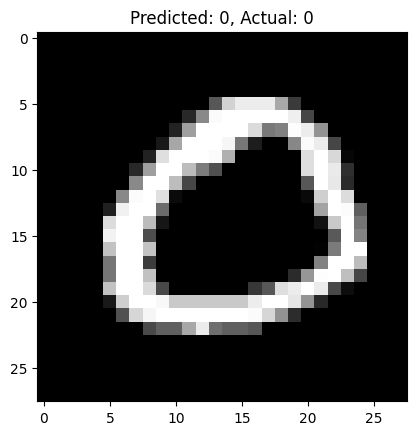

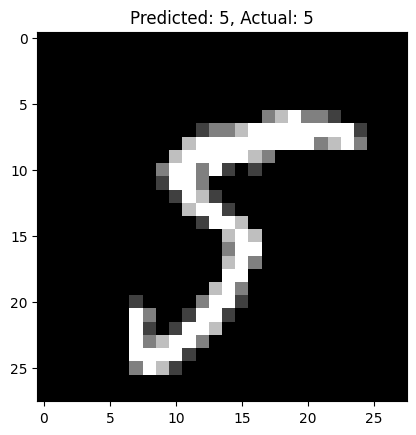

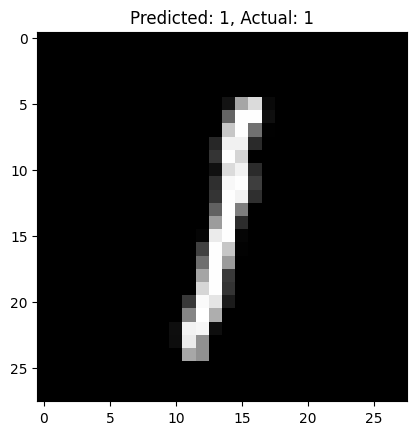

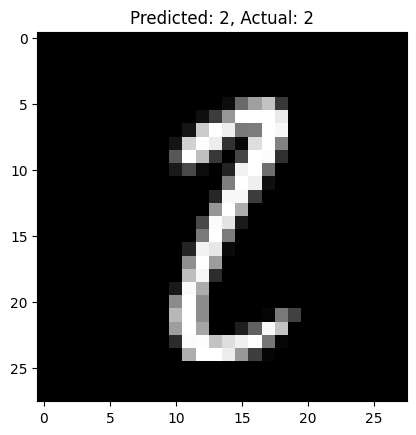

In [ ]:
# Predict on 5 random test samples
indices = np.random.choice(x_test.shape[0], 5, replace=False)
predictions = model.predict(x_test[indices])

for i, idx in enumerate(indices):
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[idx])}")
    plt.show()


###*Calculating Metrics*

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###*Save and Reload the Model*

In [ ]:
# Save the model in the new format
model.save('mnist_cnn_model.keras')

# Reload the model
from tensorflow.keras.models import load_model
loaded_model = load_model('mnist_cnn_model.keras')

# Evaluate the reloaded model
reloaded_test_loss, reloaded_test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Reloaded Model Test Accuracy: {reloaded_test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Reloaded Model Test Accuracy: 99.14%
